In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from io import StringIO

## Read files from Julia

In [11]:
arrays = []

with open('results_c.txt', 'r') as f:
    content = f.read().split('	')  # Assuming that tuples are separated by 4 spaces
    for item in content:
        #print(item)
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

# Now arrays is a list of pairs of NumPy arrays
for array_pair in arrays:
    print(array_pair)

[array([1.000e+00, 1.000e+00, 1.000e+00, ..., 5.200e+01, 1.902e+03,
       4.600e+01]), array([1., 1., 1., ..., 1., 1., 1.])]
[array([1.000e+00, 1.000e+00, 1.000e+00, ..., 8.100e+01, 1.872e+03,
       4.700e+01]), array([1., 3., 3., ..., 1., 1., 1.])]
[array([1.000e+00, 1.000e+00, 1.000e+00, ..., 1.220e+02, 1.761e+03,
       1.170e+02]), array([1., 1., 1., ..., 1., 1., 1.])]
[array([1.00e+00, 1.00e+00, 1.00e+00, ..., 4.30e+01, 1.92e+03, 3.70e+01]), array([1., 3., 3., ..., 1., 1., 1.])]
[array([1.000e+00, 1.000e+00, 1.000e+00, ..., 2.790e+02, 1.446e+03,
       2.750e+02]), array([1., 1., 1., ..., 1., 1., 1.])]
[array([1.000e+00, 1.000e+00, 1.000e+00, ..., 2.780e+02, 1.449e+03,
       2.730e+02]), array([1., 3., 3., ..., 1., 1., 1.])]
[array([1.000e+00, 1.000e+00, 1.000e+00, ..., 9.300e+01, 1.839e+03,
       6.800e+01]), array([1., 2., 3., ..., 1., 1., 1.])]
[array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.980e+02, 1.009e+03,
       4.930e+02]), array([1., 3., 3., ..., 1., 1., 1.])]
[arra

## Process arm recommendation probabilities data

In [15]:
# get the shape for All_N
arr = arrays[i]
All_N = np.array(arr[0])
All_N = All_N.reshape(-1, 3)
n_iters = All_N.shape[0]

All_N_arr = np.zeros([len(arrays), n_iters, 3])
recs = np.ones([len(arrays), n_iters+1])

for i in range(len(arrays)):
    arr = arrays[i]
    All_N = np.array(arr[0])
    recs_item = np.array(arr[1])
    recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    All_N = All_N.reshape(-1, 3)    
    All_N_arr[i] = All_N

In [16]:
# See one iteration, TODO: change it to average 
All_N = All_N_arr[0]

In [17]:
All_N.shape

(1998, 3)

In [18]:
sum_pulls = np.sum(All_N, axis=1)

In [19]:
prob1 = All_N[:,0]/sum_pulls
prob2 = All_N[:,1]/sum_pulls
prob3 = All_N[:,2]/sum_pulls

## Plot the results

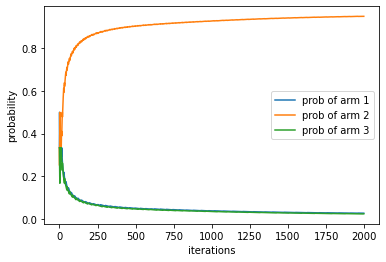

In [20]:
plt.plot(prob1, label="prob of arm 1")
plt.plot(prob2, label="prob of arm 2")
plt.plot(prob3, label="prob of arm 3")
plt.xlabel("iterations")
plt.ylabel("probability")
plt.legend()
plt.show()

In [21]:
recs

array([[1., 1., 1., ..., 1., 1., 1.],
       [3., 3., 3., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 2., ..., 1., 1., 1.],
       [1., 1., 3., ..., 1., 1., 1.]])

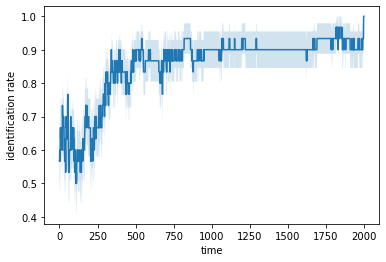

In [23]:
idx_star = 1
reps = len(arrays)
xaxis = np.arange(n_iters+1)

m = (recs == idx_star).mean(axis=0)
s = (recs == idx_star).std(axis=0)/np.sqrt(reps)
plt.plot(xaxis, m)
plt.fill_between(xaxis, m - s, m + s, alpha=0.2)

plt.xlabel('time')
plt.ylabel('identification rate')
plt.show()